![](files/intro.jpg)

# Inside the Notebook:
#####        1. Import  libraries
#####        2. Loading helper functions
#####         3. Reading data and quick overiew
#####         4. Target variables distribution
#####         5. Independent variables distribution
#####         6. Data preparation
#####         7. Training Models
#####         8. Creating Meta Classifier
#####         9. Enemble models
#####         10. Final results

## 1. Importing libraries

In [4]:
import pandas as pd                                                         ## for dataframe handling
import numpy as np                                                          ## array handling
from numpy import set_printoptions
import matplotlib.pyplot as plt                                             ## plotting
%matplotlib inline
import seaborn as sns                                                       ## plotting
from statsmodels.stats.outliers_influence import variance_inflation_factor  ## VIF calculation
from statsmodels.regression.linear_model import OLS as ols                  ## VIF calculation
from sklearn.metrics import accuracy_score                                  ## model evaluation parameters
from sklearn.metrics import precision_score, recall_score, confusion_matrix ## model evaluation parameters
from sklearn.metrics import f1_score, roc_auc_score, roc_curve,make_scorer  ## model evaluation parameters
from sklearn.model_selection import train_test_split,cross_val_score        ## Train Test split
from sklearn.svm import SVC                                                 ## SVM
from sklearn.linear_model import LogisticRegression                         ## Logistic Regression
#from sklearn.neighbors import KNeighborsClassifier                          ## K Nearest Neighbour
from sklearn.model_selection import GridSearchCV                            ## Grid Search for hyperparameter tunning
from sklearn.decomposition import PCA
#from sklearn.tree import DecisionTreeClassifier as dt                       ## Decision Tree
#from sklearn.ensemble import RandomForestClassifier                         ## Random Forest
#from sklearn.ensemble import StackingClassifier                             ## For creating meta classifier
#from sklearn.ensemble import GradientBoostingClassifier                     ## Gradient Boosting

## 2. Loading helper functions

In [5]:
def generate_model_report(y_actual, y_predicted):
    """
    Calculate model evaluation parameters with input as actual Y column and predicted Y column
    """
    from sklearn.metrics import accuracy_score ## accuracy calculations
    from sklearn.metrics import precision_score, recall_score, confusion_matrix ## model evaluation parameters
    from sklearn.metrics import f1_score, roc_auc_score, roc_curve ##some more model evaluation parameters
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass 

In [6]:
def run_my_model_svm(X,y,g,c):
    print('\033[1m Following results are for SVM Classifier \033[0;0m')
    print("\n")
    from sklearn import svm
    from sklearn import metrics
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    svm_model = svm.SVC(gamma=g, C=c)   
    svm_model.fit(X_train, y_train.values.ravel())
    model_score_train=metrics.accuracy_score(y_train,svm_model.predict(X_train))
    print('The Model Accuracy Score on train set is {}'.format(round(model_score_train,2)))
    print("\n")

    y_predict=svm_model.predict(X_test)
    generate_model_report(y_test,y_predict)
    print("\n")
    conf_mat=pd.crosstab(y_predict, y_test, rownames=['Predicted'], colnames=['Actual'])
    print('Confusion Matrix')
    print("\n")
    print(conf_mat)


In [30]:
def quick_report(df):

  """ 
  This function will give a quick overview about dataset shape, dtypes, column names and NULL value count
  
  """
  print('Data Types:')
  print(df.dtypes)
  print("----------------------------------------------------------------------")  
  print('Rows and Columns:')
  print(df.shape)
  print("----------------------------------------------------------------------")  
  print('Column Names:')
  print(df.columns)
  print("----------------------------------------------------------------------")  
  print('Number of Null Values:',df.isnull().sum().sum())
  #print(df.isnull().sum().sum())
  if df.isnull().sum().sum()>0:
    print("----------------------------------------------------------------------")  
    print('Null Values across columns:')
    print(df.apply(lambda x: sum(x.isnull())))  

In [8]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
    finaldf=df.sort_values(by='corr',ascending=False)
    return finaldf

In [9]:
def vif_cal(input_data):
    #x_vars=input_data.drop([dependent_col], axis=1)
    x_vars=input_data
    xvar_names=x_vars.columns
    vif_final=[]
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=ols(endog=y, exog=x, data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_final.append(xvar_names[i],vif)
        #print (xvar_names[i], " VIF = " , vif)
        

## 3. Reading data anda quick overview 

In [70]:
##importing dataset
data=pd.read_csv('vehicle.csv')

In [11]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [66]:
quick_report(data)

Data Types:
compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object
----------------------------------------------------------------------
Rows and Columns:
(846, 19)
----------------------------------------------------------------------
Column Names:
Index(['compactness', 'circularity', 'distance_ci

In [81]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


In [83]:
data['class'].value_counts(normalize=True)

car    0.507092
bus    0.257683
van    0.235225
Name: class, dtype: float64

In [91]:
data['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

## Replacing NA with median

In [73]:
data.fillna(data.median(),inplace=True) 

In [74]:
data.isnull().sum().sum()

0

#### Zero missing values !!

## Replacing levels under target column with numeric value such as 'van'==0, 'bus'==1, 'car'==2

In [92]:
data['class'].replace(['van','bus','car'], [0,1,2],inplace=True)

In [93]:
data['class'].value_counts(normalize=True)

2    0.507092
1    0.257683
0    0.235225
Name: class, dtype: float64

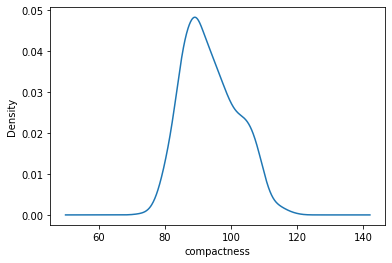

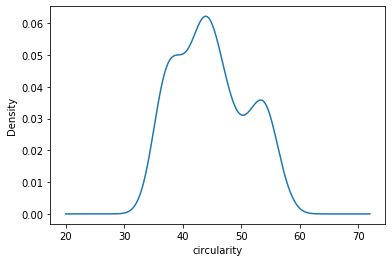

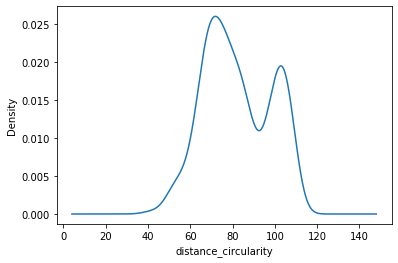

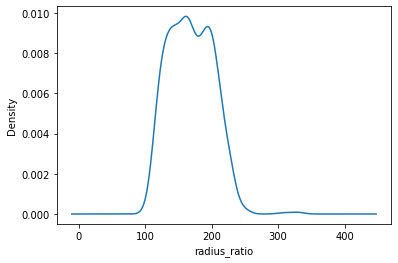

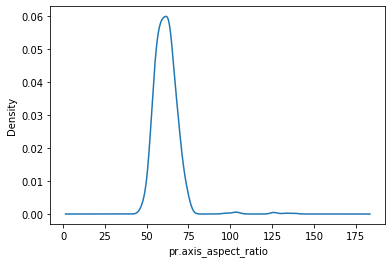

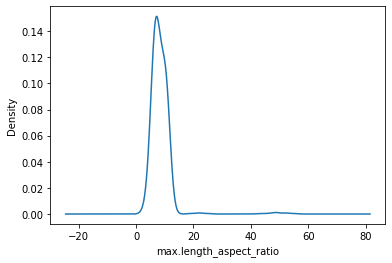

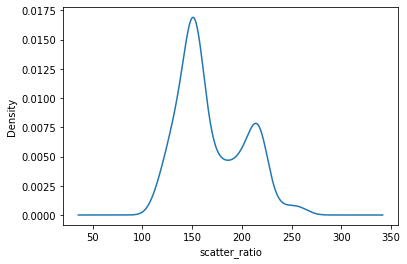

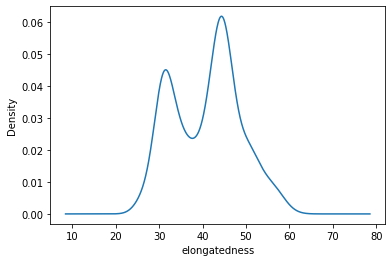

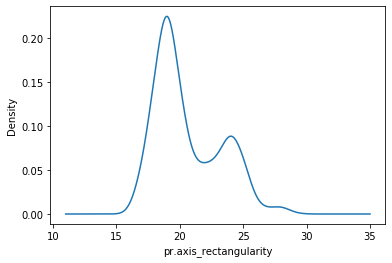

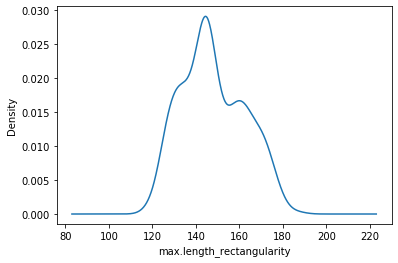

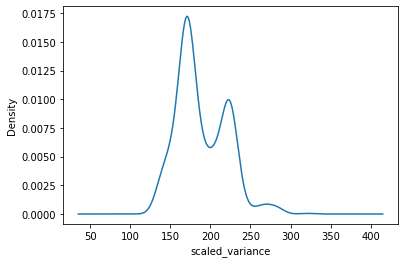

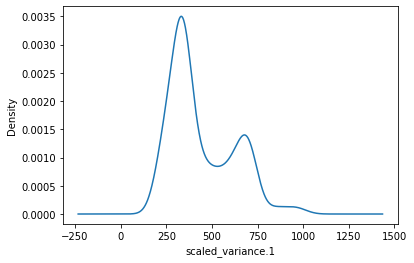

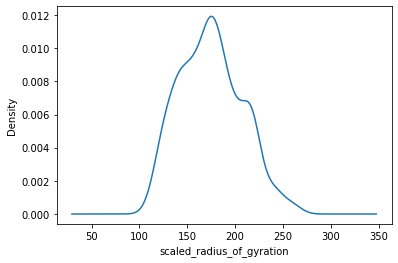

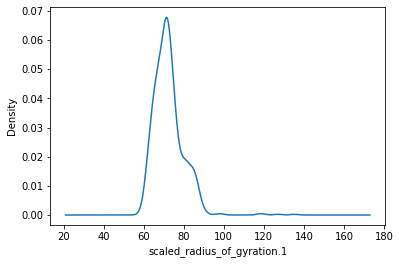

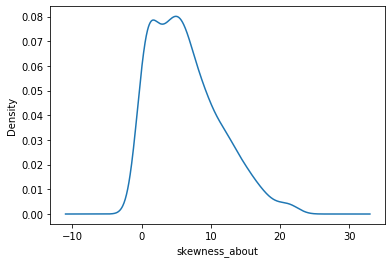

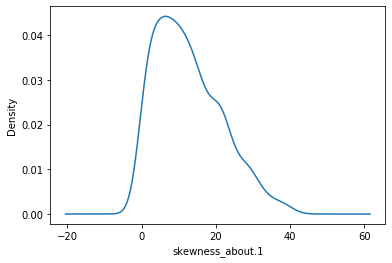

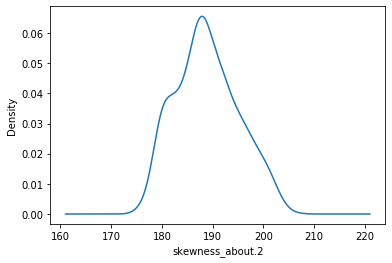

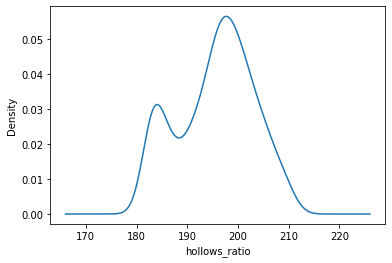

In [79]:
## Boxplot for all predictors
plt.rcParams.update({'figure.max_open_warning': 0})
cols = [col for col in data.columns if col not in ['class']]
for col in cols:
    plt.figure()
    plt.xlabel(col)
    data[col].plot.kde()

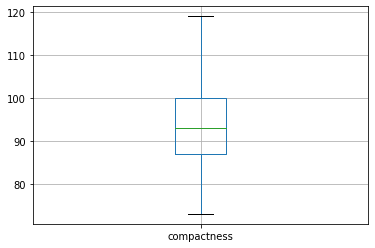

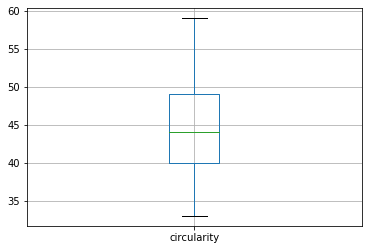

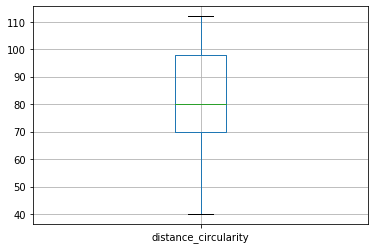

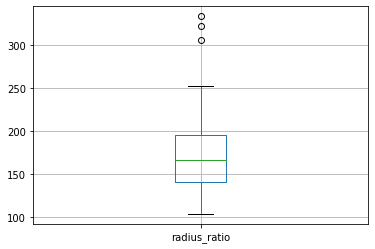

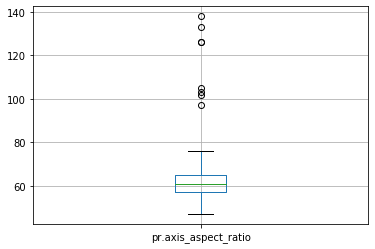

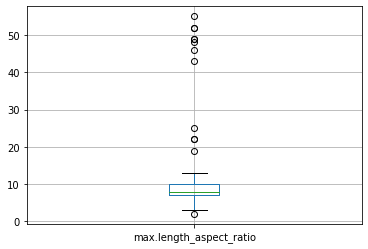

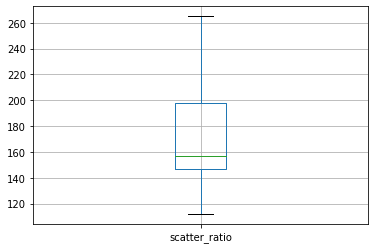

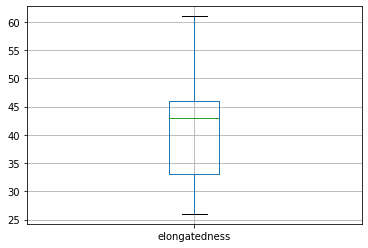

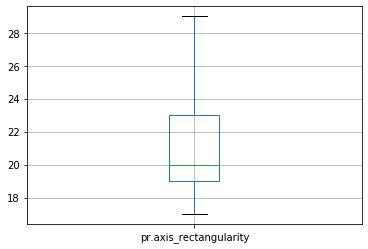

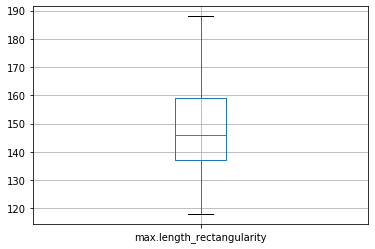

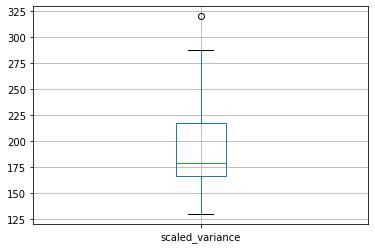

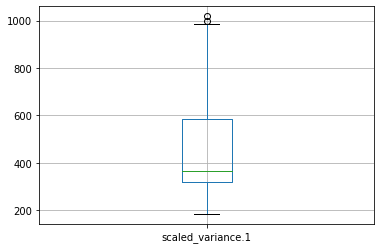

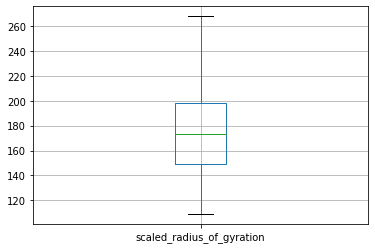

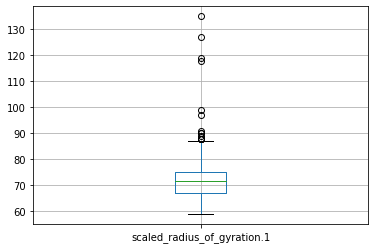

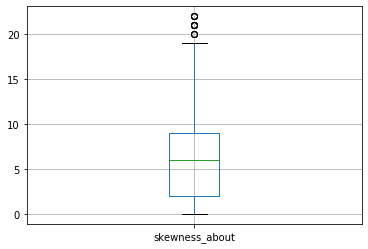

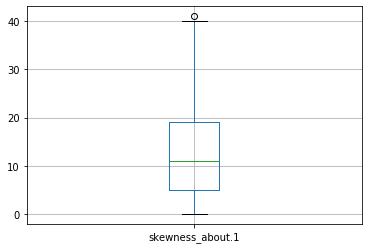

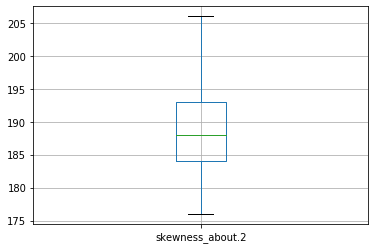

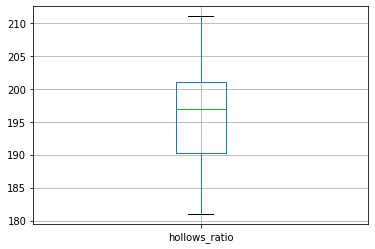

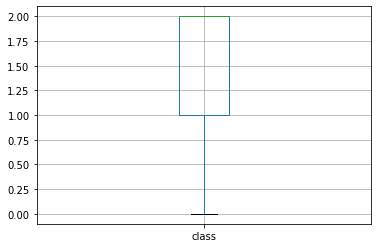

In [96]:
## Boxplot for all predictors
plt.rcParams.update({'figure.max_open_warning': 0})
for column in data:
    plt.figure()
    data.boxplot([column])

#### Follwoing variables have bi-model distribution
distance_circularity,scatter_ratio,elongatedness,pr_axis_rectangularity,scaled_variance,scaled_variance 1,hollows_ratio

In [94]:
#df2=df.drop('class',axis=1)
for col in data.columns:
  #df = data[col]
  print("Skewwed value for {} is {}".format(col,data[col].skew()))

Skewwed value for compactness is 0.38127063263996497
Skewwed value for circularity is 0.2649279874901165
Skewwed value for distance_circularity is 0.10871801180935975
Skewwed value for radius_ratio is 0.3975716412698015
Skewwed value for pr.axis_aspect_ratio is 3.8353916077858434
Skewwed value for max.length_aspect_ratio is 6.7783936191089476
Skewwed value for scatter_ratio is 0.6087097328672928
Skewwed value for elongatedness is 0.046951051315584164
Skewwed value for pr.axis_rectangularity is 0.7744056757899445
Skewwed value for max.length_rectangularity is 0.2563591641353724
Skewwed value for scaled_variance is 0.6555976294220067
Skewwed value for scaled_variance.1 is 0.8453454281630146
Skewwed value for scaled_radius_of_gyration is 0.27990964799345835
Skewwed value for scaled_radius_of_gyration.1 is 2.0899787533912066
Skewwed value for skewness_about is 0.7808132397211246
Skewwed value for skewness_about.1 is 0.6890143067342678
Skewwed value for skewness_about.2 is 0.249985069925425

#### Highly skewed variables are pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_radius_of_gyration.1

In [98]:
radiu_gy=data[['pr.axis_aspect_ratio','scaled_radius_of_gyration.1','max.length_aspect_ratio','class']]

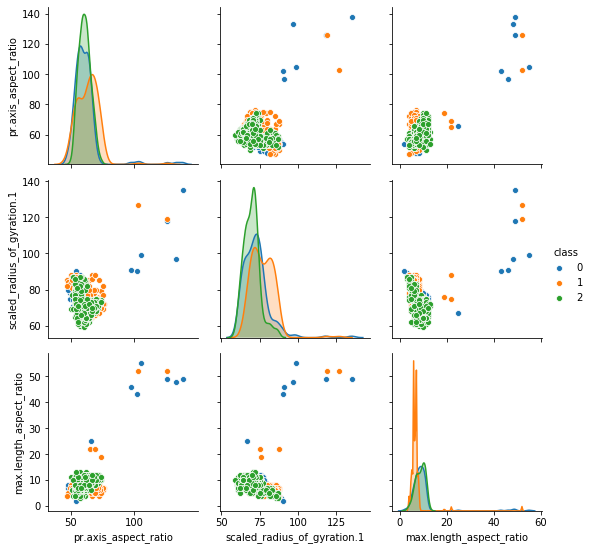

In [99]:
sns.pairplot(radiu_gy,hue='class')

#### As we can see most of the outliers values are for class bus and the proportion of observations for class bus is already low compared to car hence we cannot remove the outliers. Let's try to cap the outliers to their 99th Percentile

In [108]:
data[['pr.axis_aspect_ratio','scaled_radius_of_gyration.1','max.length_aspect_ratio']].describe()

,pr.axis_aspect_ratio,scaled_radius_of_gyration.1,max.length_aspect_ratio
count,846.000000,846.000000,846.000000
mean,61.677305,72.443262,8.567376
std,7.882188,7.468734,4.601217
min,47.000000,59.000000,2.000000
25%,57.000000,67.000000,7.000000
50%,61.000000,71.500000,8.000000
75%,65.000000,75.000000,10.000000
max,138.000000,135.000000,55.000000


In [115]:
data[['pr.axis_aspect_ratio','scaled_radius_of_gyration.1','max.length_aspect_ratio']].quantile(0.99)

pr.axis_aspect_ratio           75.55
scaled_radius_of_gyration.1    89.55
max.length_aspect_ratio        23.65
Name: 0.99, dtype: float64

In [123]:
data['pr.axis_aspect_ratio'] = np.clip(data['pr.axis_aspect_ratio'],a_min=data['pr.axis_aspect_ratio'].min(),a_max=75.55)
data['scaled_radius_of_gyration.1'] = np.clip(data['scaled_radius_of_gyration.1'],a_min=data['scaled_radius_of_gyration.1'].min(),a_max=89.55)
data['max.length_aspect_ratio'] = np.clip(data['max.length_aspect_ratio'],a_min=data['max.length_aspect_ratio'].min(),a_max=23.65)

In [130]:
data[['pr.axis_aspect_ratio','scaled_radius_of_gyration.1','max.length_aspect_ratio']].describe()

,pr.axis_aspect_ratio,scaled_radius_of_gyration.1,max.length_aspect_ratio
count,846.000000,846.000000,846.000000
mean,61.291903,72.254078,8.323700
std,5.782573,6.557656,2.725435
min,47.000000,59.000000,2.000000
25%,57.000000,67.000000,7.000000
50%,61.000000,71.500000,8.000000
75%,65.000000,75.000000,10.000000
max,75.550000,89.550000,23.650000


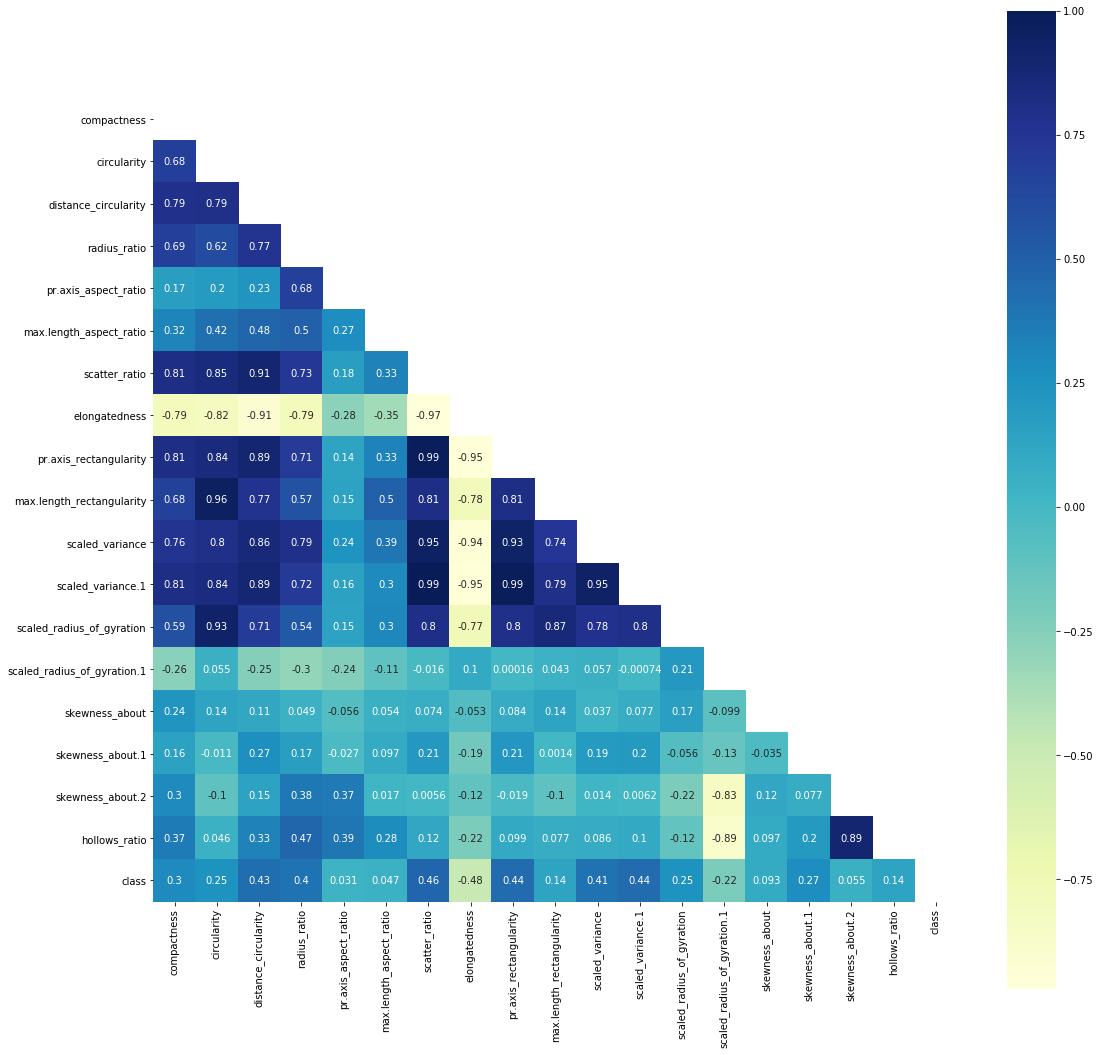

In [131]:
fig_dims = (18, 18)
fig, ax = plt.subplots(figsize=fig_dims)
corr=data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,mask=mask,annot=True,square=True,ax=ax,cmap="YlGnBu")

In [132]:
correlation_df=corrank(data)

In [141]:
print("Top 20 highly correlated pairs within the dataframe")
correlation_df.head(20)

Top 20 highly correlated pairs within the dataframe


,pairs,corr
97,"(scatter_ratio, scaled_variance.1)",0.993012
94,"(scatter_ratio, pr.axis_rectangularity)",0.989751
118,"(pr.axis_rectangularity, scaled_variance.1)",0.988213
25,"(circularity, max.length_rectangularity)",0.961318
96,"(scatter_ratio, scaled_variance)",0.948662
135,"(scaled_variance, scaled_variance.1)",0.945678
117,"(pr.axis_rectangularity, scaled_variance)",0.934227
28,"(circularity, scaled_radius_of_gyration)",0.925816
38,"(distance_circularity, scatter_ratio)",0.905076
40,"(distance_circularity, pr.axis_rectangularity)",0.893025


In [142]:
correlation_df[correlation_df['corr']>0.6].count()

pairs    44
corr     44
dtype: int64

In [143]:
target=data.groupby('class')

In [152]:
target.max()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
0,100,50.0,92.0,333.0,75.55,23.65,163.0,58.0,20.0,170,320.0,389.0,203.0,89.55,19.0,29.0,204.0,210
1,114,58.0,109.0,252.0,75.55,23.65,265.0,47.0,29.0,175,288.0,1018.0,268.0,89.55,17.0,31.0,202.0,209
2,119,59.0,112.0,234.0,74.00,13.00,227.0,61.0,25.0,188,241.0,757.0,250.0,87.00,22.0,41.0,206.0,211


In [167]:
def vif_cal(input_data):
    #x_vars=input_data.drop([dependent_col], axis=1)
    x_vars=input_data
    xvar_names=x_vars.columns
    vif_col=[]
    vif_value=[]
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=ols(endog=y, exog=x, data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_value.append(vif)
        vif_col.append(xvar_names[i])
        return vif_value,vif_col
        #print (xvar_names[i], " VIF = " , vif)
        

In [170]:
for a,b in vif_cal(data):
    print(b)

ValueError: not enough values to unpack (expected 2, got 1)